In [28]:
%matplotlib inline
#install wordcloud
#%pip install wordcloud

#install jieba for chinese and stopwordsiso for chinese stop words
#%pip install jieba
#%pip install stopwordsiso

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



# Masked wordcloud

Using a mask you can generate wordclouds in arbitrary shapes.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peilin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


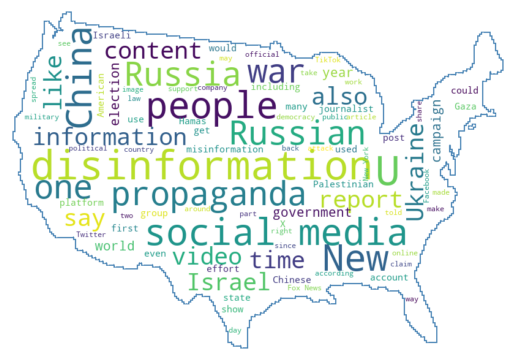

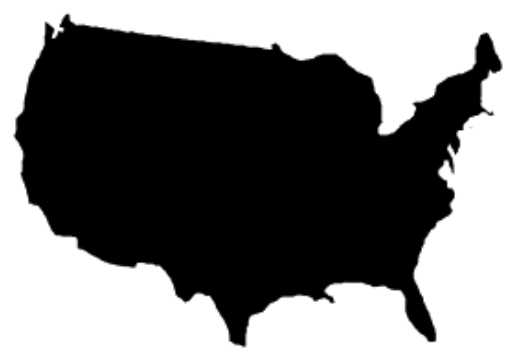

In [38]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords as nltk_stopwords

# Download NLTK stopwords dataset if not already downloaded
nltk.download('stopwords')

# Current working directory
d = os.getcwd()

# Path to the directory containing text files
text_dir = path.join(d, '../dumps-text/en/')

# Read all text files from the directory and concatenate their contents
all_text = ''
for filename in os.listdir(text_dir):
    if filename.endswith('.txt'):
        with open(path.join(text_dir, filename), 'r') as file:
            all_text += file.read() + ' '

# Read and format the mask image
usa_mask = np.array(Image.open(path.join(d, "../images/usa.png")))
# Ensure the mask is in the correct format: shape in white, background in black

# Get French stopwords from NLTK
en_stopwords = set(nltk_stopwords.words('english'))
en_stopwords.add('said')  # Add custom stopwords

# Create a WordCloud instance with adjusted settings
wc = WordCloud(background_color="white", max_words=100, mask=usa_mask,
               stopwords=en_stopwords, contour_width=1, contour_color='steelblue',
               scale=3)  # Adjust scale for higher resolution

# Generate word cloud
wc.generate(all_text)

# Save the generated word cloud to a new file
wc.to_file(path.join(d, "../images/usa_wordcloud.png"))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(usa_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


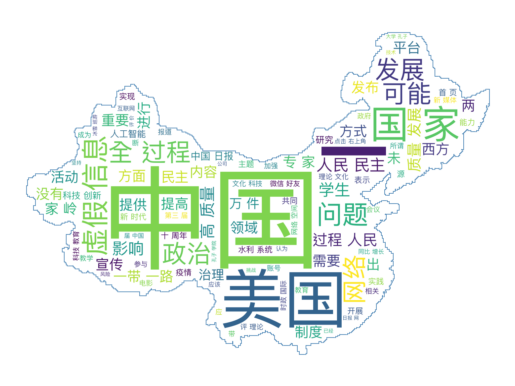

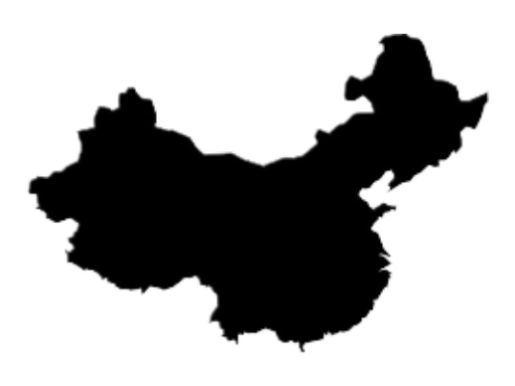

In [34]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import jieba
import re
from wordcloud import WordCloud, STOPWORDS
from stopwordsiso import stopwords

# Function to check if a word consists only of Latin letters
def is_latin_word(word):
    return re.match("^([A-Za-z]|[0-9])+$", word)

# Current working directory
d = os.getcwd()

# Path to the directory containing text files
text_dir = path.join(d, '../dumps-text/zh/')


# Read all text files from the directory and concatenate their contents
all_text = ''
for filename in os.listdir(text_dir):
    if filename.endswith('.txt'):
        with open(path.join(text_dir, filename), 'r', encoding='utf-8') as file:
            all_text += file.read() + ' '

segmented_text = list(jieba.cut(all_text))


# Initialize stopwords
stopwords_zh = stopwords("zh")
# Add any specific stopwords if needed

# Add Latin-letter words to stopwords
for word in segmented_text:
    if is_latin_word(word):
        stopwords_zh.add(word)

# Regenerate the segmented text as a string
all_text = " ".join(segmented_text)

# Read and format the mask image
china_mask = np.array(Image.open(path.join(d, "../images/china.png")))
# Ensure the mask is in the correct format: shape in white, background in black

# Create a WordCloud instance with adjusted settings
wc = WordCloud(background_color="white", max_words=100, mask=china_mask,
               stopwords=stopwords_zh, contour_width=1, contour_color='steelblue',
               scale=3, font_path='/System/Library/Fonts/PingFang.ttc')  # Specify the path to a Chinese font

# Generate word cloud
wc.generate(all_text)

# Save the generated word cloud to a new file
wc.to_file(path.join(d, "../images/china_wordcloud.png"))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(china_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peilin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


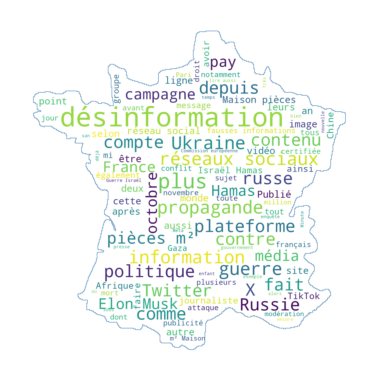

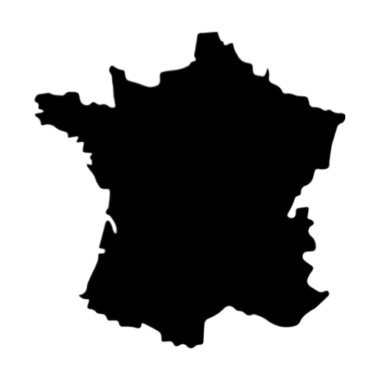

In [3]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords as nltk_stopwords

# Download NLTK stopwords dataset if not already downloaded
nltk.download('stopwords')

# Current working directory
d = os.getcwd()

# Path to the directory containing text files
text_dir = path.join(d, '../dumps-text/fr/')

# Read all text files from the directory and concatenate their contents
all_text = ''
for filename in os.listdir(text_dir):
    if filename.endswith('.txt'):
        with open(path.join(text_dir, filename), 'r', encoding='utf-8', errors='ignore') as file:
            all_text += file.read() + ' '



# Read and format the mask image
france_mask = np.array(Image.open(path.join(d, "../images/france.png")))
# Ensure the mask is in the correct format: shape in white, background in black

# Get French stopwords from NLTK
french_stopwords = set(nltk_stopwords.words('french'))
french_stopwords.add('a')  # Add custom stopwords

# Create a WordCloud instance with adjusted settings
wc = WordCloud(background_color="white", max_words=100, mask=france_mask,
               stopwords=french_stopwords, contour_width=1, contour_color='steelblue',
               scale=3)  # Adjust scale for higher resolution

# Generate word cloud
wc.generate(all_text)

# Save the generated word cloud to a new file
wc.to_file(path.join(d, "../images/france_wordcloud.png"))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(france_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()
